In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**FINDING TOP VENUES BASED ON NO.OF MATCHES**

The missing datas are filled with unknown.
Duplicates values are replaced.

---->Top venues are found using values_counts() method and head() method is used to get top 15 venues
Top 15 venues with their match count are plotted using matplolib

---->To get Top venues with their city name groupby() and size() method is used.
seaborn is used to plot top venues with their city name and no.of matches.

---->Cities having more number of stadium is found by grouping city and venue with size() method


---



In [ ]:
matches=pd.read_csv("/content/drive/MyDrive/Copy of matches.csv")

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [ ]:
matches.drop('method',axis=1,inplace=True)
matches['city'] = matches['city'].fillna(matches['venue'])
matches['player_of_match'] = matches['player_of_match'].fillna('unknown')
matches['winner'] = matches['winner'].fillna('unknown')
matches['target_runs'] = matches['target_runs'].fillna(0)
matches['target_overs'] = matches['target_overs'].fillna(0)
matches['result_margin'] = matches['result_margin'].fillna(0)

In [ ]:
matches.isnull().sum()

,0
id,0
season,0
city,0
date,0
match_type,0
player_of_match,0
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
matches.sample(15)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
925,1304096,2022,Mumbai,2022-05-05,League,DA Warner,"Brabourne Stadium, Mumbai",Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Delhi Capitals,runs,21.0,208.0,20.0,N,Navdeep Singh,NA Patwardhan
214,501238,2011,Delhi,2011-05-02,League,P Parameswaran,Feroz Shah Kotla,Delhi Daredevils,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,wickets,7.0,141.0,20.0,N,Asad Rauf,SL Shastri
953,1359478,2023,Hyderabad,2023-04-02,League,JC Buttler,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Rajasthan Royals,runs,72.0,204.0,20.0,N,KN Ananthapadmanabhan,R Pandit
626,1082641,2017,Mumbai,2017-05-11,League,WP Saha,Wankhede Stadium,Mumbai Indians,Kings XI Punjab,Mumbai Indians,field,Kings XI Punjab,runs,7.0,231.0,20.0,N,A Deshmukh,A Nand Kishore
402,729287,2014,Dubai International Cricket Stadium,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,Aleem Dar,AK Chaudhary
900,1304071,2022,Mumbai,2022-04-15,League,RA Tripathi,"Brabourne Stadium, Mumbai",Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,7.0,176.0,20.0,N,GR Sadashiv Iyer,VK Sharma
748,1178428,2019,Delhi,2019-05-04,League,A Mishra,Arun Jaitley Stadium,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,Delhi Capitals,wickets,5.0,116.0,20.0,N,AY Dandekar,IJ Gould
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,N,Aleem Dar,AM Saheba
1057,1426272,2024,Lucknow,2024-04-19,League,KL Rahul,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Chennai Super Kings,Lucknow Super Giants,Lucknow Super Giants,field,Lucknow Super Giants,wickets,8.0,177.0,20.0,N,AK Chaudhary,R Pandit
1079,1426294,2024,Delhi,2024-05-07,League,Kuldeep Yadav,"Arun Jaitley Stadium, Delhi",Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,Delhi Capitals,runs,20.0,222.0,20.0,N,KN Ananthapadmanabhan,UV Gandhe


In [ ]:
team_dup={"Delhi Daredevils":"Delhi Capitals",
"Rising Pune Supergiants":"Rising Pune Supergiant",
"Royal Challengers Bengaluru":"Royal Challengers Bangalore",'Gujarat Lions':'Gujarat Titans'}
matches.replace(to_replace=team_dup,inplace=True)

In [ ]:
city_dup={'Bengaluru':'Bangalore','Navi Mumbai':'Mumbai','Dubai International Cricket Stadium':'Dubai','Sharjah Cricket Stadium':'Sharjah'}
matches['city'].replace(to_replace=city_dup,inplace=True)

In [ ]:

matches.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium',inplace=True)
matches.replace('Brabourne Stadium, Mumbai','Brabourne Stadium',inplace=True)
matches.replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy',inplace=True)
matches.replace('Eden Gardens, Kolkata','Eden Gardens',inplace=True)
matches.replace('Wankhede Stadium, Mumbai','Wankhede Stadium',inplace=True)
matches.replace('Sawai Mansingh Stadium, Jaipur','Sawai Mansingh Stadium',inplace=True)
matches.replace('Zayed Cricket Stadium, Abu Dhabi','Sheikh Zayed Stadium',inplace=True)
matches.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium',inplace=True)
matches.replace('MA Chidambaram Stadium, Chepauk, Chennai, Chepauk','MA Chidambaram Stadium',inplace=True)
matches.replace('Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium',inplace=True)
matches.replace('Subrata Roy Sahara Stadium','Maharashtra Cricket Association Stadium',inplace=True)
matches.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)
matches.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
matches.replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association Stadium',inplace=True)
matches.replace('M Chinnaswamy Stadium, Bengaluru','M Chinnaswamy Stadium',inplace=True)
matches.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium',inplace=True)
matches.replace('Rajiv Gandhi International Stadium, Uppal, Hyderabad','Rajiv Gandhi International Stadium',inplace=True)
matches.replace('Himachal Pradesh Cricket Association Stadium, Dharamsala','Himachal Pradesh Cricket Association Stadium',inplace=True)
matches.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',inplace=True)

In [ ]:
print(matches.venue.nunique())
print(matches.team1.nunique())
print(matches.city.nunique())

40
15
34


In [ ]:
matches.venue.unique()

array(['M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium',
       'Feroz Shah Kotla', 'Wankhede Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium', 'Rajiv Gandhi International Stadium',
       'MA Chidambaram Stadium', 'Dr DY Patil Sports Academy', 'Newlands',
       "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Sa

In [ ]:
venue_count=matches.venue.value_counts()
venue_count

,count
venue,
Wankhede Stadium,118
M Chinnaswamy Stadium,94
Eden Gardens,93
Rajiv Gandhi International Stadium,77
Feroz Shah Kotla,60
Sawai Mansingh Stadium,57
MA Chidambaram Stadium,57
Punjab Cricket Association Stadium,51
Maharashtra Cricket Association Stadium,51


In [ ]:
top_venues=venue_count.head(15)
top_cities=matches.city.value_counts()
top_cities_15=top_cities.head(15)

Text(0, 0.5, 'No.of matches')

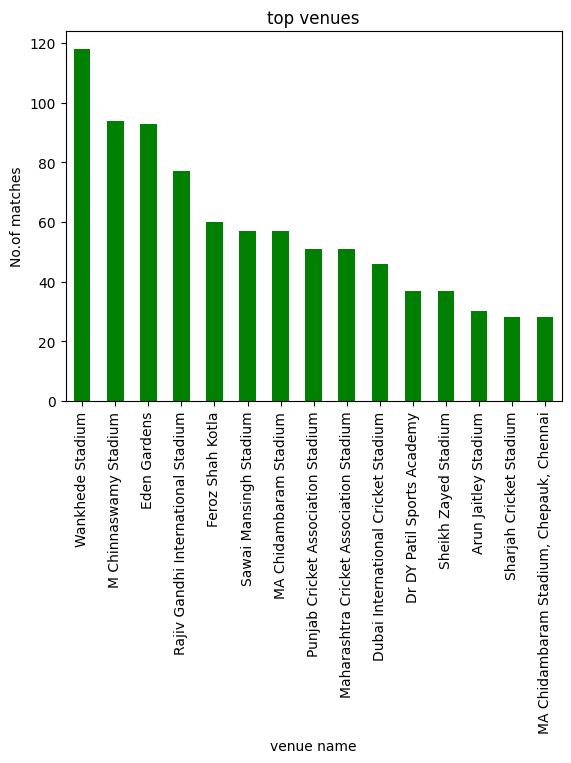

In [ ]:
top_venues.plot(kind='bar',color='green')
plt.title('top venues')
plt.xlabel('venue name')
plt.ylabel('No.of matches')

Text(0, 0.5, 'No.of matches')

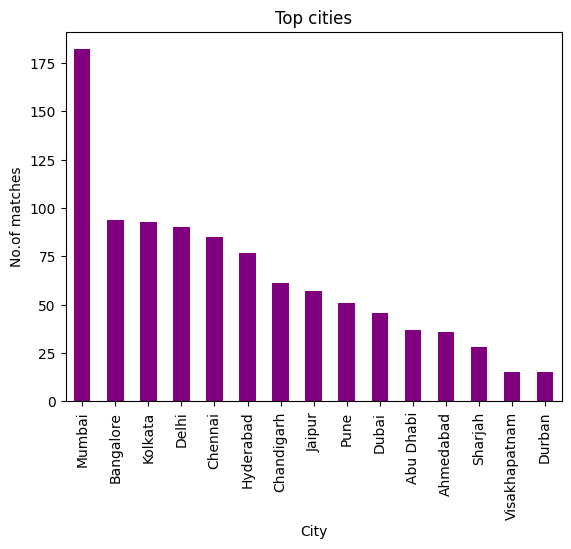

In [ ]:
top_cities_15.plot(kind='bar',color='purple')
plt.title('Top cities')
plt.xlabel('City')
plt.ylabel('No.of matches')

In [ ]:
venues_with_cities = matches.groupby(['city', 'venue']).size().reset_index(name='Matches Count')
sorted=venues_with_cities.sort_values(by='Matches Count', ascending=False)
top_10_venues_with_city = sorted.head(15)
top_10_venues_with_city

,city,venue,Matches Count
31,Mumbai,Wankhede Stadium,118
3,Bangalore,M Chinnaswamy Stadium,94
26,Kolkata,Eden Gardens,93
19,Hyderabad,Rajiv Gandhi International Stadium,77
13,Delhi,Feroz Shah Kotla,60
21,Jaipur,Sawai Mansingh Stadium,57
9,Chennai,MA Chidambaram Stadium,57
8,Chandigarh,Punjab Cricket Association Stadium,51
34,Pune,Maharashtra Cricket Association Stadium,51
15,Dubai,Dubai International Cricket Stadium,46


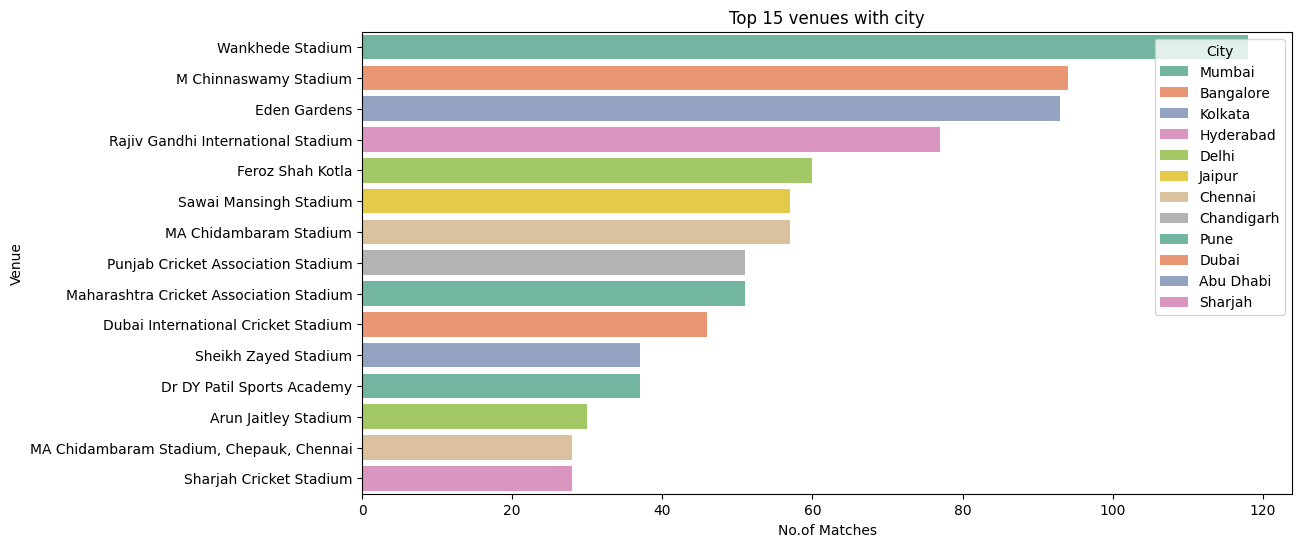

          city                                     venue  Matches Count
31      Mumbai                          Wankhede Stadium            118
3    Bangalore                     M Chinnaswamy Stadium             94
26     Kolkata                              Eden Gardens             93
19   Hyderabad        Rajiv Gandhi International Stadium             77
13       Delhi                          Feroz Shah Kotla             60
21      Jaipur                    Sawai Mansingh Stadium             57
9      Chennai                    MA Chidambaram Stadium             57
8   Chandigarh        Punjab Cricket Association Stadium             51
34        Pune   Maharashtra Cricket Association Stadium             51
15       Dubai       Dubai International Cricket Stadium             46
0    Abu Dhabi                      Sheikh Zayed Stadium             37
30      Mumbai                Dr DY Patil Sports Academy             37
12       Delhi                      Arun Jaitley Stadium        

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Matches Count', y='venue', hue='city', data=top_10_venues_with_city, palette='Set2')
plt.title('Top 15 venues with city')
plt.xlabel('No.of Matches')
plt.ylabel('Venue')
plt.legend(title='City', loc='upper right')
plt.show()
print(top_10_venues_with_city)

In [ ]:
no_of_venues=matches.groupby('city')['venue'].nunique().reset_index(name='Number of Venues')
top_cities_having_more_stadium=no_of_venues.sort_values(by='Number of Venues',ascending=False)
top_5_cities=top_cities_having_more_stadium.head(5)
top_5_cities

,city,Number of Venues
25,Mumbai,3
9,Delhi,2
1,Ahmedabad,2
6,Chandigarh,2
7,Chennai,2
